# Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
import keras
import os
import cv2
from keras.models import Sequential
from keras.layers import Conv2D , MaxPool2D ,Flatten , Dense, Dropout
from keras.utils import to_categorical
from keras.layers import Convolution2D , MaxPooling2D , Dense , Dropout , Flatten
from PIL import Image

# Assigning path

In [2]:
train_path = r"House Dataset\Training"

# Creating categories

In [3]:
category = ['House' , 'Not House'] ## so index for this is 0,1

# Create Training Data

In [4]:
image_size =200         # Resizing images into 200 X 200

train_images = []        # empty list to append our images into numeric array format.
                    
train_images = []
for i in category:
    folder = os.path.join(train_path ,i)     # joining train folder and individual category folder path 
    label = category.index(i)            # assigining label to each folder
    for image in os.listdir(folder):    # Itreating through all images in the path "folder"
        image_path = os.path.join(folder , image)     # joining folder and image path  
        image_array = cv2.imread(image_path)   # cv2. imread() method loads an image from the specified path
        image_array =cv2.resize(image_array , (image_size , image_size) )        # Resizing images into 200 X 200
        train_images.append([image_array , label])

In [5]:
train_images

[[array([[[126, 160, 183],
          [128, 162, 185],
          [129, 163, 186],
          ...,
          [148, 181, 200],
          [148, 181, 200],
          [149, 182, 201]],
  
         [[126, 160, 183],
          [128, 162, 185],
          [128, 162, 185],
          ...,
          [148, 181, 200],
          [148, 181, 200],
          [150, 183, 202]],
  
         [[126, 160, 183],
          [128, 162, 185],
          [127, 161, 184],
          ...,
          [148, 181, 200],
          [148, 181, 200],
          [149, 182, 201]],
  
         ...,
  
         [[ 83, 107, 126],
          [ 85, 109, 128],
          [ 80, 104, 122],
          ...,
          [103, 129, 153],
          [103, 129, 153],
          [104, 130, 154]],
  
         [[ 86, 108, 126],
          [ 88, 110, 128],
          [ 84, 106, 124],
          ...,
          [103, 130, 151],
          [103, 130, 151],
          [101, 128, 149]],
  
         [[ 84, 107, 123],
          [ 86, 109, 125],
          [ 87, 110, 126

In [6]:
len(train_images)

442

In [7]:
train_images([0])

TypeError: 'list' object is not callable

# Shuffle the Dataset

In [7]:
np.random.shuffle(train_images)

# Assigning Labels and Features

In [8]:
X = []
Y = []

for X_values , labels in train_images:
    X.append(X_values)
    Y.append(labels)

X = np.array(X)
Y = np.array(Y)

In [9]:
X

array([[[[217, 231, 237],
         [219, 232, 239],
         [219, 233, 239],
         ...,
         [238, 249, 253],
         [238, 249, 253],
         [238, 249, 253]],

        [[220, 232, 238],
         [221, 233, 239],
         [223, 235, 241],
         ...,
         [237, 248, 252],
         [237, 248, 252],
         [237, 248, 252]],

        [[219, 230, 238],
         [221, 232, 240],
         [221, 232, 240],
         ...,
         [237, 248, 252],
         [238, 249, 253],
         [238, 249, 253]],

        ...,

        [[ 96, 126, 173],
         [ 92, 125, 171],
         [ 89, 123, 169],
         ...,
         [237, 238, 238],
         [242, 244, 244],
         [242, 244, 244]],

        [[ 99, 129, 176],
         [ 93, 123, 170],
         [ 85, 118, 164],
         ...,
         [238, 240, 240],
         [243, 245, 245],
         [244, 246, 246]],

        [[ 92, 120, 167],
         [ 91, 121, 168],
         [ 85, 118, 165],
         ...,
         [242, 244, 244],
        

In [10]:
Y

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,

In [11]:
print(X.shape)
print(Y.shape)

(442, 200, 200, 3)
(442,)


# Checking sample images

0


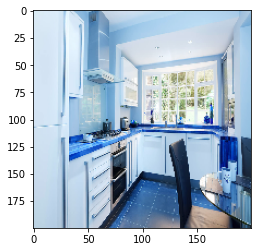

In [12]:
x=2
plt.imshow(X[x])
print(Y[x])

0


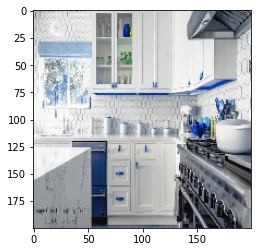

In [13]:
x=5
plt.imshow(X[x])
print(Y[x])

# Normalising X 

In [14]:
X=X/255

# Split X and Y for use in CNN

In [15]:
from sklearn.model_selection import train_test_split
X_test,X_train,y_test , y_train = train_test_split(X,Y , train_size=0.2 )

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 200, 200, 3)
(88, 200, 200, 3)
(354,)
(88,)


# Define, compile and train the CNN Model

In [17]:
batch_size = 16
nb_classes =4
nb_epochs = 10
img_rows, img_columns = 200, 200
img_channel = 3
nb_filters = 32
nb_pool = 2
nb_conv = 3

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(2,  activation=tf.nn.softmax)
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model1 = model.fit(X_train, y_train, batch_size = batch_size, epochs = nb_epochs, verbose = 1, validation_data = (X_test, y_test))

Epoch 1/10
23/23 [==============================] - 18s 753ms/step - loss: 1.2884 - accuracy: 0.5565 - val_loss: 0.6812 - val_accuracy: 0.6136
Epoch 2/10
23/23 [==============================] - 18s 767ms/step - loss: 0.5898 - accuracy: 0.7006 - val_loss: 0.4913 - val_accuracy: 0.7955
Epoch 3/10
23/23 [==============================] - 17s 730ms/step - loss: 0.3961 - accuracy: 0.8277 - val_loss: 0.4013 - val_accuracy: 0.8295
Epoch 4/10
23/23 [==============================] - 18s 784ms/step - loss: 0.3309 - accuracy: 0.8559 - val_loss: 0.4279 - val_accuracy: 0.8068
Epoch 5/10
23/23 [==============================] - 18s 789ms/step - loss: 0.2202 - accuracy: 0.9153 - val_loss: 0.3582 - val_accuracy: 0.8523
Epoch 6/10
23/23 [==============================] - 18s 790ms/step - loss: 0.1424 - accuracy: 0.9661 - val_loss: 0.4804 - val_accuracy: 0.8409
Epoch 7/10
23/23 [==============================] - 18s 795ms/step - loss: 0.0867 - accuracy: 0.9802 - val_loss: 0.3734 - val_accuracy: 0.8523

# Accuracy and Score of model

In [19]:
score = model.evaluate(X_test, y_test, verbose = 0 )
print("Test Score: ", score[0])
print("Test accuracy: ", score[1])

Test Score:  0.6173561215400696
Test accuracy:  0.7954545617103577


# loading the test data

In [20]:
image_size = 200 
test_path = r"House Dataset\Testing"
test_images = []
for img in os.listdir(test_path):
    image_path_2 = os.path.join(test_path , img)
    image_array_2 = cv2.imread(image_path_2)
    image_array_2 =cv2.resize(image_array_2 , (image_size , image_size) )
    test_images.append(image_array_2)

In [21]:
len(test_images)

111

In [22]:
test_images

[array([[[243, 243, 243],
         [243, 243, 243],
         [241, 241, 241],
         ...,
         [240, 241, 239],
         [242, 243, 241],
         [242, 242, 242]],
 
        [[237, 237, 237],
         [237, 237, 237],
         [239, 239, 239],
         ...,
         [241, 242, 240],
         [239, 240, 238],
         [237, 237, 237]],
 
        [[242, 242, 242],
         [242, 242, 242],
         [242, 242, 242],
         ...,
         [237, 237, 236],
         [241, 241, 240],
         [243, 243, 243]],
 
        ...,
 
        [[ 66,  82, 111],
         [ 70,  85, 117],
         [ 64,  79, 112],
         ...,
         [202, 202, 202],
         [202, 202, 202],
         [199, 201, 201]],
 
        [[ 66,  82, 111],
         [ 65,  81, 110],
         [ 61,  79, 112],
         ...,
         [202, 202, 202],
         [202, 202, 202],
         [199, 201, 201]],
 
        [[ 67,  86, 115],
         [ 69,  83, 111],
         [ 66,  86, 119],
         ...,
         [200, 200, 200],
  

In [23]:
Test_X=[]
for X_val in test_images:
    print(X_val)
    Test_X.append(X_val)
Test_X=np.array(Test_X)

[[[243 243 243]
  [243 243 243]
  [241 241 241]
  ...
  [240 241 239]
  [242 243 241]
  [242 242 242]]

 [[237 237 237]
  [237 237 237]
  [239 239 239]
  ...
  [241 242 240]
  [239 240 238]
  [237 237 237]]

 [[242 242 242]
  [242 242 242]
  [242 242 242]
  ...
  [237 237 236]
  [241 241 240]
  [243 243 243]]

 ...

 [[ 66  82 111]
  [ 70  85 117]
  [ 64  79 112]
  ...
  [202 202 202]
  [202 202 202]
  [199 201 201]]

 [[ 66  82 111]
  [ 65  81 110]
  [ 61  79 112]
  ...
  [202 202 202]
  [202 202 202]
  [199 201 201]]

 [[ 67  86 115]
  [ 69  83 111]
  [ 66  86 119]
  ...
  [200 200 200]
  [200 200 200]
  [197 199 199]]]
[[[179 207 224]
  [ 94 116 129]
  [101 116 124]
  ...
  [ 85 127 148]
  [ 82 124 146]
  [ 81 122 144]]

 [[164 197 220]
  [172 202 221]
  [163 188 204]
  ...
  [ 86 129 150]
  [ 83 126 147]
  [ 82 125 146]]

 [[154 191 211]
  [158 194 215]
  [166 198 221]
  ...
  [ 86 131 152]
  [ 86 131 152]
  [ 82 127 148]]

 ...

 [[101 129 140]
  [ 82  91  98]
  [110 108 108]
  ..

In [24]:
# Normalizing
Test_X = Test_X/255

In [25]:
Test_X

array([[[[0.95294118, 0.95294118, 0.95294118],
         [0.95294118, 0.95294118, 0.95294118],
         [0.94509804, 0.94509804, 0.94509804],
         ...,
         [0.94117647, 0.94509804, 0.9372549 ],
         [0.94901961, 0.95294118, 0.94509804],
         [0.94901961, 0.94901961, 0.94901961]],

        [[0.92941176, 0.92941176, 0.92941176],
         [0.92941176, 0.92941176, 0.92941176],
         [0.9372549 , 0.9372549 , 0.9372549 ],
         ...,
         [0.94509804, 0.94901961, 0.94117647],
         [0.9372549 , 0.94117647, 0.93333333],
         [0.92941176, 0.92941176, 0.92941176]],

        [[0.94901961, 0.94901961, 0.94901961],
         [0.94901961, 0.94901961, 0.94901961],
         [0.94901961, 0.94901961, 0.94901961],
         ...,
         [0.92941176, 0.92941176, 0.9254902 ],
         [0.94509804, 0.94509804, 0.94117647],
         [0.95294118, 0.95294118, 0.95294118]],

        ...,

        [[0.25882353, 0.32156863, 0.43529412],
         [0.2745098 , 0.33333333, 0.45882353]

In [26]:
predictions_test_data = np.argmax(model.predict(Test_X), axis=-1)

4/4 [==============================] - 1s 245ms/step


In [27]:
predictions_test_data

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1], dtype=int64)